In [2]:
import astropy
import numpy as np
import matplotlib
from astropy.io import fits
from astropy.wcs import WCS
from astropy.utils.data import get_pkg_data_filename
import astropy.units as u
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
import pandas as pd
plt.style.use(astropy_mpl_style)

%matplotlib inline

In [5]:
file = fits.open('/Users/FRANNYPACK/Downloads/grind!/research/Data/MW_foreground_SMC.fits')
file.info()
file[0].header

Filename: /Users/FRANNYPACK/Downloads/grind!/research/Data/MW_foreground_SMC.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU   13495   (3901, 3471, 84)   float32   


SIMPLE  =                    T  /                                               
BITPIX  =                  -32  /                                               
NAXIS   =                    3  /                                               
NAXIS1  =                 3901  /                                               
NAXIS2  =                 3471  /                                               
NAXIS3  =                   84  /                                               
EXTEND  =                    T  /                                               
BSCALE  =    1.00000000000E+00  /                                               
BZERO   =    0.00000000000E+00  /                                               
BLANK   =                   -1  /                                               
BUNIT   = 'K       '  /                                                         
DATE-OBS= '2019-12-22T06:12:09.7'  /                                            
TELESCOP= 'ASKAP   '  /     

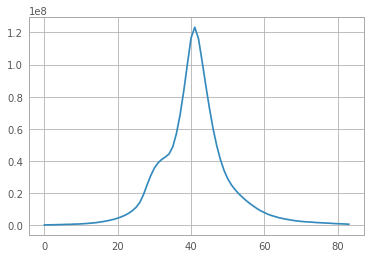

In [7]:
file[0].data[file[0].data == -32786] = np.nan
sum_data = np.nansum(np.nansum(file[0].data, axis = 1), axis = 1)
plt.plot(sum_data) # plot of brightness intensity vs velocity

In [6]:
# flattening the 3D cube into 2D column density map by integrating along z-axis (velocity)
file[0].data[file[0].data == -32786] = np.nan
tot_col_dens = 1.82 * (10 ** 18) * np.nansum(file[0].data, axis = 0) * 0.977198303456 # in cm^-2, last val = velocity channel width ("CDELT3")


In [9]:
# tot_col_dens w/ a log function applied to it

tot_col_dens_log = np.log10(tot_col_dens)
print(tot_col_dens_log)

[[-inf -inf -inf ... -inf -inf -inf]
 [-inf -inf -inf ... -inf -inf -inf]
 [-inf -inf -inf ... -inf -inf -inf]
 ...
 [-inf -inf -inf ... -inf -inf -inf]
 [-inf -inf -inf ... -inf -inf -inf]
 [-inf -inf -inf ... -inf -inf -inf]]


/var/folders/xk/1lmd1p057bnc571tp2ws6_sc0000gp/T/ipykernel_19899/642278943.py:3: RuntimeWarning: divide by zero encountered in log10
  tot_col_dens_log = np.log10(tot_col_dens)
/var/folders/xk/1lmd1p057bnc571tp2ws6_sc0000gp/T/ipykernel_19899/642278943.py:3: RuntimeWarning: invalid value encountered in log10
  tot_col_dens_log = np.log10(tot_col_dens)


In [10]:
print(tot_col_dens)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [7]:
# function to plot column density given a range of velocities
def get_col_dens(file_name, title, subtitle, save, name):
    wcs = WCS(file[0].header)
    ax = plt.subplot(projection = wcs, slices = ['x','y',1], zorder = -1) # (slices isn't doing anything here)
    plt.grid(b = True, which = 'major', axis = 'both', linewidth = 1, color = 'white', zorder = -1)
    plt.xlabel('Right Ascension', fontname = 'Times New Roman', fontsize = 20)
    plt.ylabel('Declination', fontname = 'Times New Roman', fontsize = 20)
    plt.title(title, y = 1.06, fontname = 'Times New Roman', fontsize = 22)
    plt.suptitle(subtitle, x = 0.45, y = 0.94, fontsize = 12)
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['text.color'] = 'Black'
    plt.rcParams['font.size'] = '14'
    plt.imshow(file_name, cmap = 'magma', vmin = -0.25 * 10 ** 21, vmax = 0.73 * 10 ** 21, zorder = -1)
    plt.colorbar()
    
    if save == True: # saves figure
        plt.savefig(name, bbox_inches='tight')

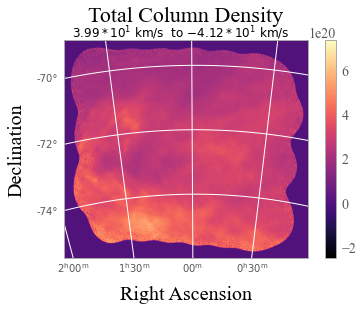

In [8]:
# column density over all the velocity ranges 

get_col_dens(tot_col_dens, 'Total Column Density', '$\mathregular{3.99 * 10^{1}}$ km/s  to $\mathregular{-4.12 * 10^{1}}$ km/s', True, 'SMC_cold_tot.png')


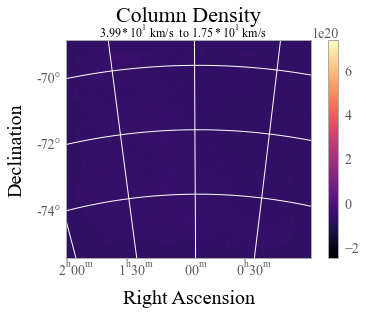

In [9]:
# column density over 3.99 * 10^1 km/s to 1.75 * 10^1 km/s (0th to 22rd index)
# region of velocities where filamentary structures not prominent at all!

col_dens1 = 1.82 * (10 ** 18) * np.nansum(file[0].data[0:22], axis = 0) * 0.977198303456 
get_col_dens(col_dens1, 'Column Density', '$\mathregular{3.99 * 10^{1}}$ km/s  to $\mathregular{1.75 * 10^{1}}$ km/s', False, 'no')
plt.imshow(col_dens1, cmap = 'magma', vmin = -1.5 * 10 ** 20, vmax = 7 * 10 ** 20)

# is the same color throughout no matter the range set

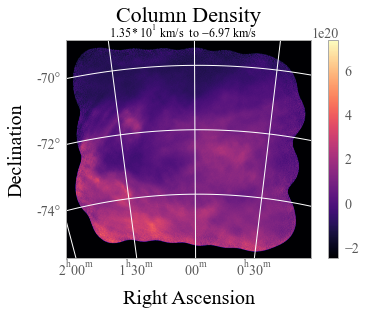

In [10]:
# column density over 1.35 * 10^1 km/s to -6.97 km/s (25th to 44th index)
# region of velocities where MANY filamentary structures come into play

col_dens2 = 1.82 * (10 ** 18) * np.nansum(file[0].data[25:44,:,:], axis = 0) * 0.977198303456 
get_col_dens(col_dens2, 'Column Density', '$\mathregular{1.35 * 10^{1}}$ km/s  to $\mathregular{-6.97}$ km/s', False, 'no')
plt.imshow(col_dens2, cmap = 'magma', vmin = 0, vmax = 6 * 10 ** 20)

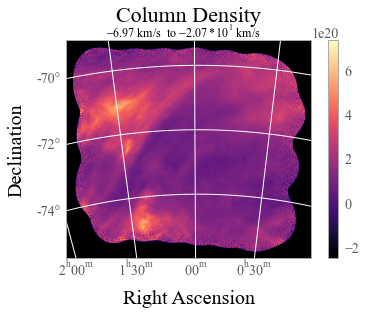

In [11]:
# column density over -6.97 km/s to -2.07 * 10^1 km/s (44th to 59th index)
# region of velocities where filamentary structures not very prominent

col_dens3 = 1.82 * (10 ** 18) * np.nansum(file[0].data[44:59,:,:], axis = 0) * 0.977198303456 
get_col_dens(col_dens3, 'Column Density', '$\mathregular{-6.97}$ km/s  to $\mathregular{-2.07 * 10^{1}}$ km/s', False, 'no')
plt.imshow(col_dens3, cmap = 'magma', vmin = -2 * 10 ** 3, vmax = 2 * 10 ** 20)

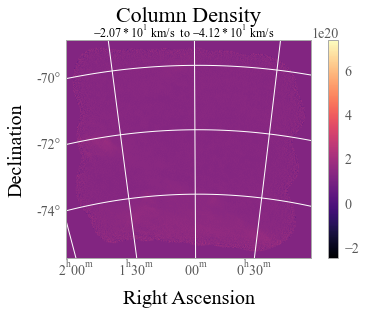

In [12]:
# column density over -2.07 * 10^1 km/s to -4.12 * 10^1 km/s (44th to 59th index)
# region of velocities where filamentary structures not prominent at all!

col_dens4 = 1.82 * (10 ** 18) * np.nansum(file[0].data[59:84,:,:], axis = 0) * 0.977198303456 
get_col_dens(col_dens4, 'Column Density', '$\mathregular{-2.07 * 10^{1}}$ km/s  to $\mathregular{-4.12 * 10^{1}}$ km/s', False, 'no')
plt.imshow(col_dens4, cmap = 'magma', vmin = -3 * 10 ** 20, vmax = 5 * 10 ** 20)

# is the same color throughout no matter the range set

In [13]:
# information from the absorption line data file

s_file = pd.read_csv('/Users/FRANNYPACK/Downloads/grind!/research/Data/FUSE_output.csv')
print(s_file)

                    Target     RA_FK5    DEC_FK5 Galaxy    SpecType  \
0                    AV104  12.910521 -72.801528    SMC      B0.5Ia   
1                    AV135  13.206333 -72.140722    SMC       O7III   
2                     AV14  11.636083 -73.101556    SMC       O3-4V   
3                     AV15  11.675792 -73.415194    SMC        O7II   
4                    AV170  13.926992 -73.291675    SMC     O9.7III   
5                    AV207  14.638292 -71.929583    SMC         O7V   
6                    AV208  14.638250 -72.658778    SMC         NaN   
7                    AV215  14.731708 -72.535583    SMC        B0Ia   
8                    AV216  14.746588 -72.742706    SMC       B1III   
9                    AV220  14.792108 -72.096689    SMC     O6.5?fp   
10                   AV243  15.028333 -72.788611    SMC         O6V   
11                   AV255  15.175458 -71.520361    SMC         O9V   
12                    AV26  11.958625 -73.139083    SMC       O7III   
13    

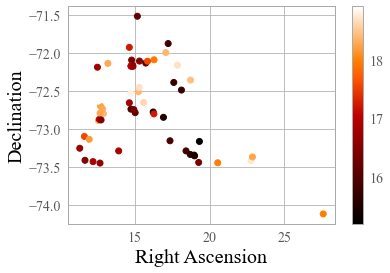

In [14]:
# graph of absorption line data as a function of sky position

x = s_file['RA_FK5']
y = s_file['DEC_FK5']
brightness = s_file['log10_N_MW']
def s_graph():
    plt.scatter(x, y, marker = 'o', c = brightness, zorder = 1)
    plt.colorbar()
    plt.xlabel('Right Ascension', fontname = 'Times New Roman', fontsize = 20)
    plt.ylabel('Declination', fontname = 'Times New Roman', fontsize = 20)
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['text.color'] = 'Black'
    plt.rcParams['font.size'] = '14'
    
s_graph()

In [15]:
# make 2D header (using Prof. Clark's data)

def make_flat_hdr(file):
    hdr = file[0].header
    
    # Make a 2D header 
    flathdr = fits.Header()
    flathdr["NAXIS   "] = 2
    flathdr["NAXIS1  "] = hdr["NAXIS1  "]
    flathdr["NAXIS2  "] = hdr["NAXIS2  "]
    flathdr["CRPIX1  "] = hdr["CRPIX1  "]
    flathdr["CRPIX2  "] = hdr["CRPIX2  "]
    flathdr["CRVAL1  "] = hdr["CRVAL1  "]
    flathdr["CRVAL2  "] = hdr["CRVAL2  "]
    flathdr["CDELT1  "] = hdr["CDELT1  "]
    flathdr["CDELT2  "] = hdr["CDELT2  "]
    flathdr["CTYPE1  "] = hdr["CTYPE1  "]
    flathdr["CTYPE2  "] = hdr["CTYPE2  "]
    flathdr["LONPOLE "] = hdr["LONPOLE "]
    flathdr["LATPOLE "] = hdr["LATPOLE "]
    
    return flathdr

In [16]:
file_flat_hdr = make_flat_hdr(file)

In [17]:
# creates grid of (ra, dec) values corresponding to each pixel
def coordinate_4_pix(flat_hdr): 
    NAXIS1 = flat_hdr["NAXIS1"]
    NAXIS2 = flat_hdr["NAXIS2"]
    x = np.arange(NAXIS1)
    y = np.arange(NAXIS2)
    X, Y = np.meshgrid(x, y) # return coordinate matrices from coordinate vectors
    w = WCS(flat_hdr)
    ra, dec = w.wcs_pix2world(X, Y, 0)# turns pixel coordinates into world coordinates
    coords = np.dstack((ra,dec)) # stack arrays in sequence along 3rd axis
    return coords

In [18]:
coords = coordinate_4_pix(file_flat_hdr)

In [69]:
# function to plot the absorption line data on top of specific channel maps
def chan_map_abs_plt(coordinates, cube, subtitle, vmin_val, vmax_val, color, save_fig, name):
    fig = plt.figure(figsize = (10,7))
    image = plt.pcolormesh(coordinates[:, :, 0], coordinates[:, :, 1], cube, vmin = vmin_val , vmax = vmax_val, shading = 'auto', cmap = 'magma')
    scatter_pts = plt.scatter(x, y, c = brightness, cmap = color)
    plt.colorbar(scatter_pts, label='N(H$_2$)')
    plt.colorbar(image)
    plt.xlim(30, 0)
    plt.xlabel('Right Ascension', fontname = 'Times New Roman', fontsize = 20)
    plt.ylabel('Declination', fontname = 'Times New Roman', fontsize = 20)
    plt.title('Absorption Line Measurements on $N_H$ Map', y = 1.06, fontname = 'Times New Roman', fontsize = 22)
    plt.suptitle(subtitle, x = 0.36, y = 0.93, fontsize = 14)
    
    if save_fig == True:
        plt.savefig(name, bbox_inches='tight')
    

/var/folders/xk/1lmd1p057bnc571tp2ws6_sc0000gp/T/ipykernel_23754/589878958.py:4: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  image = plt.pcolormesh(coordinates[:, :, 0], coordinates[:, :, 1], cube, vmin = vmin_val , vmax = vmax_val, shading = 'auto', cmap = 'magma')


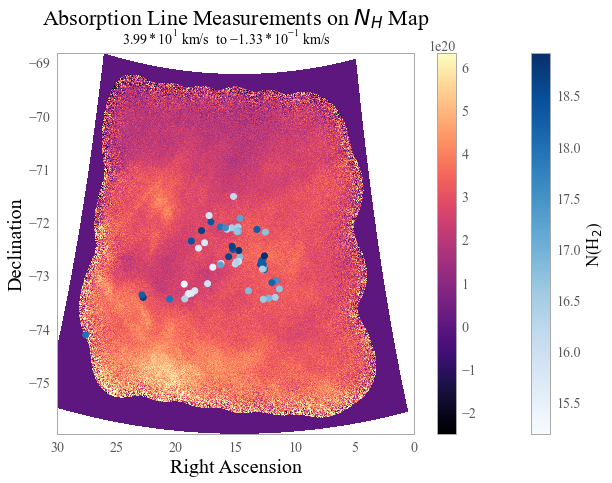

In [70]:
# plots abs line data atop of ALL data
# note that this graph is the column density graph but reflected over the y-axis
chan_map_abs_plt(coords, tot_col_dens, '$\mathregular{3.99 * 10^{1}}$ km/s  to $\mathregular{-1.33 * 10^{-1}}$ km/s', -0.25 * 10 ** 21, 0.63 * 10 ** 21, 'Blues', False, 'no')


/var/folders/xk/1lmd1p057bnc571tp2ws6_sc0000gp/T/ipykernel_23754/589878958.py:4: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  image = plt.pcolormesh(coordinates[:, :, 0], coordinates[:, :, 1], cube, vmin = vmin_val , vmax = vmax_val, shading = 'auto', cmap = 'magma')


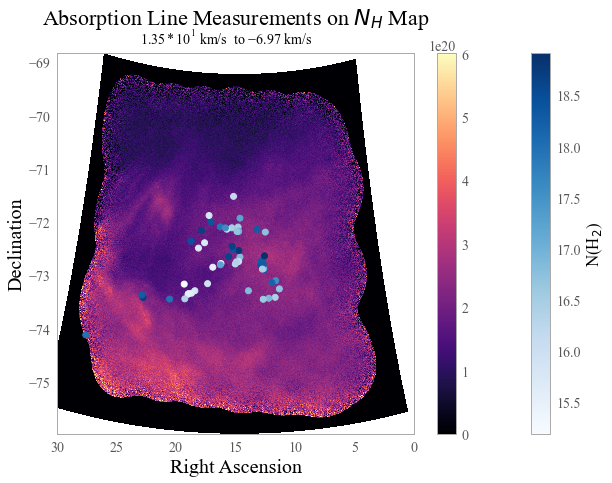

In [72]:
#plots abs line data atop on channel map from v = 1.35 * 10^1 km/s to -6.97 km/s
chan_map_abs_plt(coords, col_dens2, '$\mathregular{1.35 * 10^{1}}$ km/s  to $\mathregular{-6.97}$ km/s', 0, 6 * 10 ** 20, 'Blues', False, 'no')


/var/folders/xk/1lmd1p057bnc571tp2ws6_sc0000gp/T/ipykernel_23754/589878958.py:4: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  image = plt.pcolormesh(coordinates[:, :, 0], coordinates[:, :, 1], cube, vmin = vmin_val , vmax = vmax_val, shading = 'auto', cmap = 'magma')


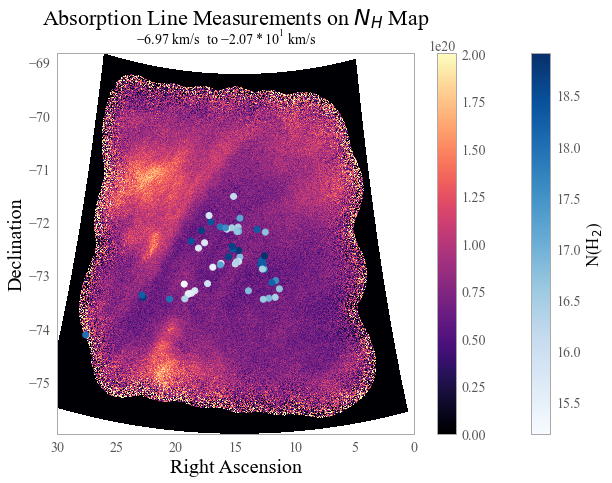

In [73]:
#plots abs line data atop on channel map from v = -6.97 km/s to -2.07 * 10^1 km/s

chan_map_abs_plt(coords, col_dens3, '$\mathregular{-6.97}$ km/s  to $\mathregular{-2.07 * 10^{1}}$ km/s', -2 * 10 ** 3, 2 * 10 ** 20, 'Blues', False, 'no')


In [23]:
cube_50_84 = 1.82 * (10 ** 18) * np.nansum(file[0].data[50:84,:,:], axis = 0) * 0.977198303456 

/var/folders/xk/1lmd1p057bnc571tp2ws6_sc0000gp/T/ipykernel_23754/589878958.py:4: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  image = plt.pcolormesh(coordinates[:, :, 0], coordinates[:, :, 1], cube, vmin = vmin_val , vmax = vmax_val, shading = 'auto', cmap = 'magma')


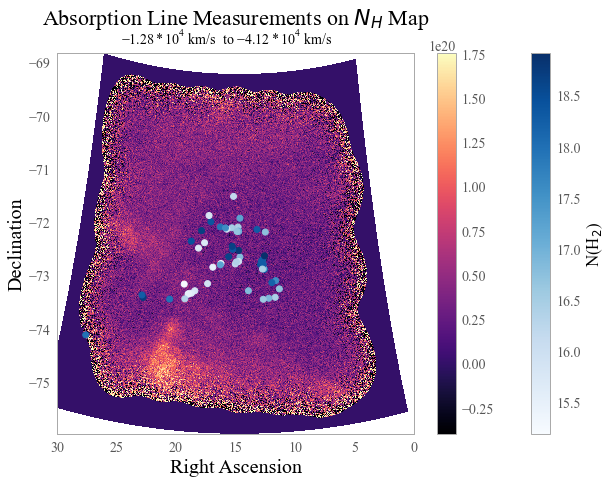

In [74]:
#plots abs line data atop on channel map from v = -1.28 * 10^4 km/s to -4.12 * 10^4 km/s

chan_map_abs_plt(coords, cube_50_84, '$\mathregular{-1.28 * 10^{4}}$ km/s  to $\mathregular{-4.12 * 10^{4}}$ km/s', -0.4 * 10 ** 20, 1.75 * 10 ** 20, 'Blues', False, 'no')


[12.910521 13.206333 11.636083333299998 11.6757916667 13.926992000000002
 14.6382916667 14.63825 14.731708 14.746588 14.792108 15.028332999999998
 15.175458 11.958625 15.244875 15.289125 15.315333 15.589292000000002
 15.7376666667 16.2322083333 16.280542 16.2893333333 16.9184583333 17.0745
 17.233375 17.356082999999998 17.608175 17.856196 18.1206666667
 12.2139583333 18.426667 18.729417 19.320042 20.5465 11.325833 12.507375
 12.5725 12.6354166667 12.682917 12.681129 12.7167083333 12.840208
 12.5755833333 14.860708 14.770042000000002 14.754542 14.751625 12.75075
 15.8551666667 18.708333 18.966292000000003 18.9951666667 22.767625
 22.866667 27.59425 14.883125 14.9405 19.271667]


[-72.801528 -72.140722 -73.1015555556 -73.4151944444 -73.291675
 -71.9295833333 -72.658778 -72.535583 -72.74270600000001 -72.096689
 -72.788611 -71.520361 -73.1390833333 -72.513806 -72.457833 -72.109833
 -72.654067 -72.1359166667 -72.7799166667 -72.805083 -72.0930555556
 -72.8498888889 -71.998417 -71.879583 -73.

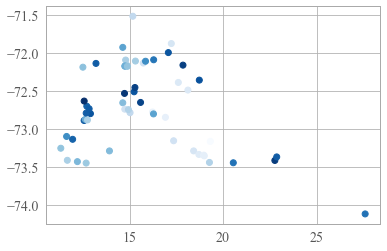

In [75]:
# grab pixel associated with location of each absorption line 

scatter_pts = plt.scatter(x, y, c = brightness, cmap = 'Blues')
ax = plt.gca()
ra_vals = scatter_pts.get_offsets()[:,0] # gets RA vals
dec_vals = scatter_pts.get_offsets()[:,1] # gets dec vals

print(ra_vals)
print("\n")
print(dec_vals)

In [26]:
# gives pix vals associated w RA/DEC vals using FITS header

def get_pix_vals(flat_FITS_hdr):
    wcs = WCS(flat_FITS_hdr)
    pix_arr = []
    x_pix = []
    y_pix = []
    for i in range(0, len(ra_vals)):
        arr = []
        x_pix, y_pix = wcs.all_world2pix(ra_vals[i], dec_vals[i], 0)
        arr.append(x_pix)
        arr.append(y_pix)
        pix_arr.append(arr)
    
    return pix_arr

In [27]:
# creates separate arrays of x and y pixel coordinates
# not rly using this rn tho

def sep_xy_vals(pix_arr, flat_FITS_hdr):
    pix_arr = get_pix_vals(file_flat_hdr)
    x_pix = []
    y_pix = []
    for i in range(0, len(pix_arr)):
        x_pix.append(float((pix_arr[i][0])))
        y_pix.append(float((pix_arr[i][1])))
    
    print(x_pix)
    print("\n")
    print(y_pix)
    return x_pix, y_pix


In [28]:
# gives arr of H1 col densities given the pixels with which the background stars corresponded to 

def col_dens_arr(pix_arr, col_dens_vals):
    HI_col_dens = []
    HI_col_dens_nolog = [] # array of the col dens w/o a logarithmic function applied to it
    for i in range(0, len(pix_arr)):
        col_dens = col_dens_vals[int(pix_arr[i][1])][int(pix_arr[i][0])] # RA values = 1, Dec = 0
        # so the values are logarithmic (to match H2 col dens) and in cm^-2
        HI_col_dens_nolog.append(col_dens)
        HI_col_dens.append(np.log10(col_dens))
    

    print(HI_col_dens)
    print('\n')
    print(len(HI_col_dens))
    print('\n')
    print(HI_col_dens_nolog)
    print('\n')
    print(min(HI_col_dens_nolog), max(HI_col_dens_nolog))
    print(np.log10(min(HI_col_dens_nolog)), np.log10(max(HI_col_dens_nolog)))
    
    return HI_col_dens

In [29]:
# plot of HI col dens VS H2 col dens

def HI_H2_plt(HI_col_dens, x_range, y_range, v_range):
    H2_col_dens = s_file['log10_N_MW']
    plt.scatter(H2_col_dens, HI_col_dens, zorder = 1)
    plt.xticks(x_range)
    plt.yticks(y_range) 
    plt.grid(color = 'black', linestyle = '--', linewidth = 0.7, zorder = -1)
    plt.xlabel('log$_{10}$(N$_{H2}$) [cm$^{-2}$]')
    plt.ylabel('log$_{10}$(N$_{HI}$) [cm$^{-2}$]')
    plt.title('HI Column Density VS H$_2$ Column Density', y = 1.1, x = 0.5)
    plt.suptitle(v_range, y = .97, x = 0.5)

In [30]:
# get coords of pts on scatter plot

def HI_H2_plt_coords(HI_col_dens):
    H2_col_dens = s_file['log10_N_MW']
    plot = plt.scatter(H2_col_dens, HI_col_dens)
    coords = plot.get_offsets()
    x = []
    y = []
    for i in range(len(coords)):
        x.append(coords[i][0])
        y.append(coords[i][1])
    
    return x, y

In [31]:
def line_of_best_fit(col_arr, x_lim_arr, y_lim_arr):
    x, y = HI_H2_plt_coords(col_arr) 
    slope, intercept = np.polyfit(x, y, 1)
    y_vals = [] 
    for i in range(len(x)):
        y_vals.append((x[i] * slope) + intercept)
        
    plt.plot(x, y_vals)
    plt.xlim([x_lim_arr[0], x_lim_arr[1]])
    plt.ylim([y_lim_arr[0], y_lim_arr[1]])
    print("Slope: " + str(slope))

In [76]:
# gets HI col dens values over entire range of velocities 

pix_arr = get_pix_vals(file_flat_hdr)
x_ran = np.arange(15, 19, 0.5)
y_ran_tot = np.arange(20.35, 20.65, 0.05)
HI_cd_arr_tot = col_dens_arr(pix_arr, tot_col_dens)

[20.552452, 20.50663, 20.4666, 20.485281, 20.455898, 20.438389, 20.53295, 20.53026, 20.50714, 20.387638, 20.478863, 20.379799, 20.540945, 20.46249, 20.538784, 20.476421, 20.45313, 20.380665, 20.4581, 20.38531, 20.434074, 20.42439, 20.442663, 20.460602, 20.348183, 20.467373, 20.46726, 20.412521, 20.474642, 20.334028, 20.380629, 20.406013, 20.41006, 20.465, 20.475178, 20.542753, 20.48955, 20.45489, 20.467207, 20.463547, 20.562227, 20.616377, 20.454554, 20.464628, 20.531563, 20.54874, 20.543758, 20.44438, 20.454292, 20.337631, 20.36251, 20.471735, 20.529402, 20.626217, 20.480322, 20.527653, 20.39304]


57


[3.5682224e+20, 3.2109286e+20, 2.9281993e+20, 3.0569034e+20, 2.8569256e+20, 2.744026e+20, 3.4115295e+20, 3.390475e+20, 3.2146965e+20, 2.4414005e+20, 3.012051e+20, 2.3977189e+20, 3.4749166e+20, 2.9006188e+20, 3.4576678e+20, 2.9951657e+20, 2.8387772e+20, 2.4025042e+20, 2.8714365e+20, 2.428334e+20, 2.7169001e+20, 2.6570006e+20, 2.771171e+20, 2.8880307e+20, 2.2293712e+20, 2.9334172e+20, 2.

In [33]:
print(tot_col_dens[int(pix_arr[0][1])][int(pix_arr[0][0])])

3.5682224e+20


# DEBUGGING AND CHECKING WHETHER PIXEL VALUES ARE CORRECT

In [59]:
# colors in pixels in square shape on figure
def color_pix(arr, ra, dec):
        arr[dec][ra] = 20
        for j in range(50):
            for k in range(50):
                arr[dec - k][ra - j] = 20

[array(2369.90696534), array(1627.54112385)]


/var/folders/xk/1lmd1p057bnc571tp2ws6_sc0000gp/T/ipykernel_23754/589878958.py:4: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  image = plt.pcolormesh(coordinates[:, :, 0], coordinates[:, :, 1], cube, vmin = vmin_val , vmax = vmax_val, shading = 'auto', cmap = 'magma')


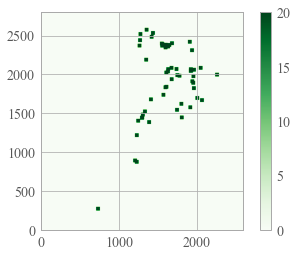

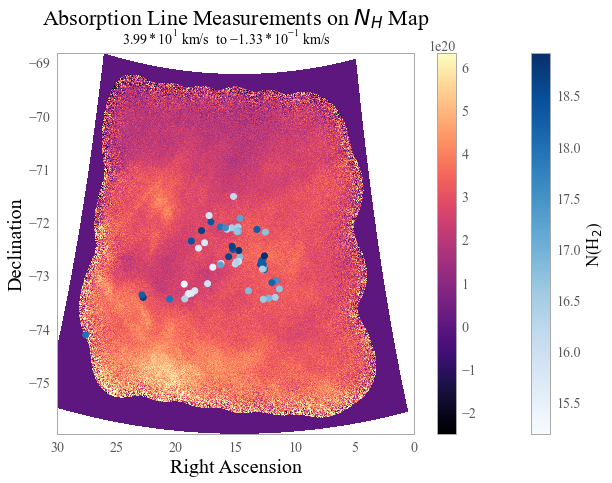

In [80]:
print(pix_arr[0])
arr = np.zeros((2800, 2600))

for i in range(len(pix_arr)):
    # pix_arr[i][0] gives the pixel associated with the RA value
    # pix_arr[i][1] gives the pixel associated with the Dec value

    ra = int(pix_arr[i][0])
    dec = int(pix_arr[i][1])
    
    color_pix(arr, ra, dec)

plt.imshow(arr, cmap = 'Greens', origin = 'lower')
plt.colorbar()
chan_map_abs_plt(coords, tot_col_dens, '$\mathregular{3.99 * 10^{1}}$ km/s  to $\mathregular{-1.33 * 10^{-1}}$ km/s', -0.25 * 10 ** 21, 0.63 * 10 ** 21, 'Blues', False, 'no')

Slope: 0.028103726260503465


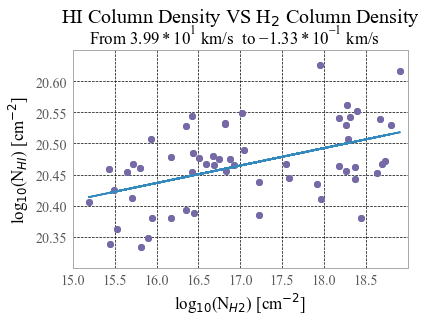

In [81]:
# integrated over entire range of velocities
# decent amount of correlation

H2_col_dens = s_file['log10_N_MW']
HI_H2_plt(HI_cd_arr_tot, x_ran, y_ran_tot, 'From $\mathregular{3.99 * 10^{1}}$ km/s  to $\mathregular{-1.33 * 10^{-1}}$ km/s')

# adding line of best fit
x = [15, 19]
y1 = [20.3, 20.65]
line_of_best_fit(HI_cd_arr_tot, x, y1)


In [82]:
HI_cd_arr2 = col_dens_arr(pix_arr, col_dens2)
y_ran2 = np.arange(20.1, 20.6, 0.05)


[20.40565, 20.350203, 20.355745, 20.344702, 20.306763, 20.329943, 20.378025, 20.405735, 20.373768, 20.316582, 20.305193, 20.184206, 20.398224, 20.355553, 20.370958, 20.314516, 20.320667, 20.281815, 20.287638, 20.233727, 20.292679, 20.195833, 20.279694, 20.278318, 20.216038, 20.303656, 20.285809, 20.208757, 20.363733, 20.16373, 20.207432, 20.222193, 20.241154, 20.351223, 20.314846, 20.394861, 20.404604, 20.37676, 20.335224, 20.416718, 20.4262, 20.487423, 20.293896, 20.346798, 20.316465, 20.346827, 20.37633, 20.227877, 20.270182, 20.202698, 20.159275, 20.33974, 20.36735, 20.583427, 20.31631, 20.350441, 20.180532]


57


[2.544773e+20, 2.2397659e+20, 2.2685346e+20, 2.2115758e+20, 2.0265751e+20, 2.1376833e+20, 2.3879475e+20, 2.545277e+20, 2.3646584e+20, 2.0729193e+20, 2.0192619e+20, 1.528288e+20, 2.5016354e+20, 2.2675316e+20, 2.3494053e+20, 2.06308e+20, 2.0925115e+20, 1.9134416e+20, 1.9392657e+20, 1.7128762e+20, 1.96191e+20, 1.5697596e+20, 1.9041154e+20, 1.898094e+20, 1.644512e+20, 2.01212

Slope: 0.04025190840384943


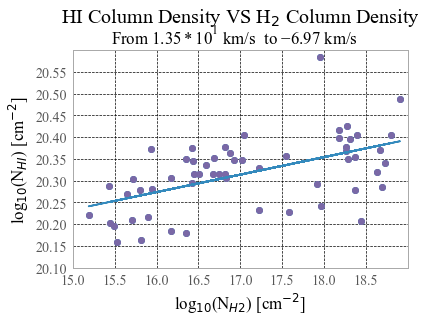

In [83]:
HI_H2_plt(HI_cd_arr2, x_ran, y_ran2, 'From $\mathregular{1.35 * 10^{1}}$ km/s  to $\mathregular{-6.97}$ km/s')

y2 = [20.1, 20.6]
line_of_best_fit(HI_cd_arr2, x, y2)

In [84]:
HI_cd_arr3 = col_dens_arr(pix_arr, col_dens3)
y_ran3 = np.arange(19.45, 20.35, 0.05)

[19.917957, 19.964945, 19.779284, 19.83992, 19.683908, 19.807472, 19.881475, 19.844313, 19.83557, 19.858658, 19.856968, 19.857075, 19.881247, 19.825985, 19.890131, 19.810505, 19.7645, 19.514929, 19.768263, 19.84146, 19.715992, 19.839008, 19.873575, 19.82833, 19.81217, 19.750204, 19.865866, 19.824707, 19.847044, 19.709661, 19.820112, 19.87379, 19.893402, 19.748817, 19.776556, 19.797176, 19.658957, 19.798214, 19.747412, 19.73469, 19.890114, 19.826302, 19.968216, 19.86716, 19.912992, 19.90707, 19.870045, 19.749117, 19.850813, 19.679064, 19.855886, 19.819082, 19.93236, 20.27903, 19.899506, 19.900742, 19.855837]


57


[8.2786066e+19, 9.224527e+19, 6.0156595e+19, 6.9170426e+19, 4.8295595e+19, 6.4190716e+19, 7.611603e+19, 6.9873463e+19, 6.848084e+19, 7.2220005e+19, 7.1939586e+19, 7.1957235e+19, 7.607588e+19, 6.6986145e+19, 7.764803e+19, 6.464055e+19, 5.8143424e+19, 3.2728776e+19, 5.864927e+19, 6.9416097e+19, 5.1998636e+19, 6.9025154e+19, 7.47437e+19, 6.7348738e+19, 6.488885e+19, 5.6260563e+1

Slope: 0.019788175566969338


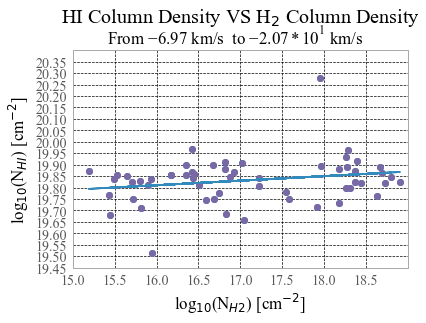

In [85]:
HI_H2_plt(HI_cd_arr3, x_ran, y_ran3, 'From $\mathregular{-6.97}$ km/s  to $\mathregular{-2.07 * 10^{1}}$ km/s')

y3 = [19.45, 20.4]
line_of_best_fit(HI_cd_arr3, x, y3)

In [87]:
col_dens5 = 1.82 * (10 ** 18) * np.nansum(file[0].data[36:40], axis = 0) * 0.977198303456
HI_cd_arr5 = col_dens_arr(pix_arr, col_dens5)
y_ran5 = np.arange(19.55, 20.1, 0.05)

[19.924269, 19.880476, 19.890793, 19.813005, 19.735529, 19.827826, 19.800873, 19.768488, 19.881157, 19.77931, 19.699862, 19.695642, 19.899788, 19.686474, 19.864206, 19.80099, 19.73982, 19.677485, 19.666489, 19.681, 19.780176, 19.660841, 19.78967, 19.714525, 19.684761, 19.792624, 19.882391, 19.677704, 19.87953, 19.674583, 19.780785, 19.74432, 19.631788, 19.801725, 19.934008, 19.890415, 19.905972, 19.860855, 19.80231, 19.965273, 19.971039, 20.055397, 19.794737, 19.805288, 19.71493, 19.835695, 19.86175, 19.672138, 19.771406, 19.693602, 19.64881, 19.602568, 19.691097, 19.68208, 19.80138, 19.81546, 19.615711]


57


[8.399782e+19, 7.594094e+19, 7.776649e+19, 6.50137e+19, 5.4391354e+19, 6.7270655e+19, 6.322267e+19, 5.867962e+19, 7.606007e+19, 6.0160236e+19, 5.010275e+19, 4.9618435e+19, 7.939387e+19, 4.8581807e+19, 7.31486e+19, 6.323953e+19, 5.493145e+19, 4.7586595e+19, 4.6396923e+19, 4.7973306e+19, 6.0280342e+19, 4.579739e+19, 6.1612867e+19, 5.1823317e+19, 4.8390514e+19, 6.2033135e+19, 7.627

Slope: 0.03522827595715164


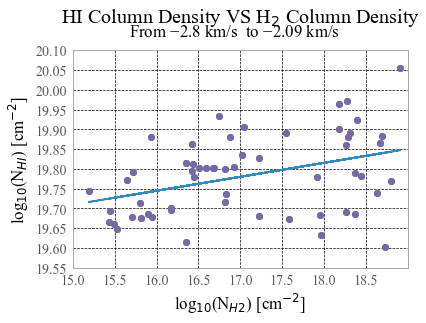

In [88]:
HI_H2_plt(HI_cd_arr5, x_ran, y_ran5, 'From $\mathregular{-2.8}$ km/s  to $\mathregular{-2.09}$ km/s')

y5 = [19.55, 20.1]
line_of_best_fit(HI_cd_arr5, x, y5)

In [89]:
col_dens6 = 1.82 * (10 ** 18) * np.nansum(file[0].data[37:43], axis = 0) * 0.977198303456
HI_cd_arr6 = col_dens_arr(pix_arr, col_dens6)
y_ran6 = np.arange(19.65, 20.3, 0.05)

[20.168097, 20.139719, 20.165651, 20.14579, 20.084843, 20.158995, 20.139668, 20.17161, 20.160004, 20.104061, 20.078432, 20.025007, 20.203495, 20.172895, 20.199259, 20.082571, 20.158024, 20.050922, 20.036627, 20.042278, 20.113152, 20.014605, 20.126791, 20.079699, 19.954136, 20.087473, 20.112125, 20.051556, 20.15861, 19.936338, 20.0465, 20.050241, 20.045593, 20.087734, 20.127245, 20.143852, 20.190487, 20.173878, 20.111668, 20.19686, 20.187355, 20.239246, 20.111353, 20.140728, 20.086298, 20.142447, 20.156647, 20.064653, 20.024117, 20.00745, 19.974693, 20.05068, 20.058544, 19.721474, 20.11149, 20.14478, 19.960758]


57


[1.4726379e+20, 1.379491e+20, 1.4643723e+20, 1.3989121e+20, 1.2157455e+20, 1.4421003e+20, 1.3793265e+20, 1.4846028e+20, 1.4454536e+20, 1.2707529e+20, 1.1979332e+20, 1.0592719e+20, 1.597697e+20, 1.4890056e+20, 1.5821927e+20, 1.2094056e+20, 1.4388773e+20, 1.1244062e+20, 1.0879956e+20, 1.1022433e+20, 1.2976341e+20, 1.034201e+20, 1.3390294e+20, 1.2014287e+20, 8.9977725e+19, 1.

Slope: 0.03115331286140444


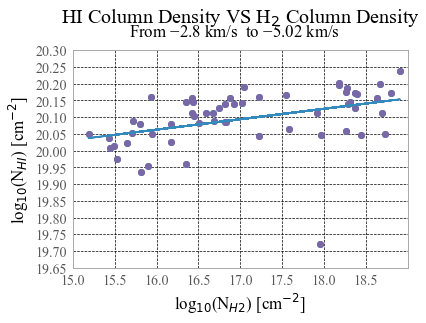

In [90]:
# this is where most of the structure seems to lie and, with the exception of one outlier, LOTS of correlation between the structure
HI_H2_plt(HI_cd_arr6, x_ran, y_ran6, 'From $\mathregular{-2.8}$ km/s  to $\mathregular{-5.02}$ km/s')

y6 = [19.65, 20.3]
line_of_best_fit(HI_cd_arr6, x, y6)

[432. 288.]


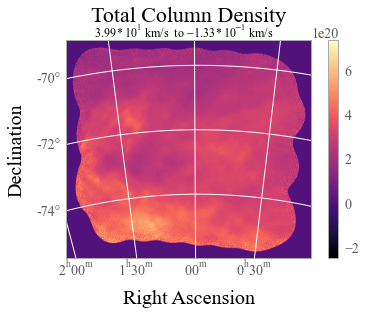

In [775]:
# save this figure (3/4 GASKAP-HI Meeting)
get_col_dens(tot_col_dens, 'Total Column Density', '$\mathregular{3.99 * 10^{1}}$ km/s  to $\mathregular{-1.33 * 10^{-1}}$ km/s', True, 'tot_col_dens_plt.png')


[432. 288.]


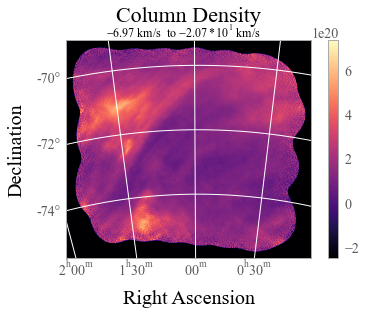

In [779]:
# save this figure (3/4 GASKAP-HI Meeting)
get_col_dens(col_dens3, 'Column Density', '$\mathregular{-6.97}$ km/s  to $\mathregular{-2.07 * 10^{1}}$ km/s', False, 'col_dens3_plt')
plt.imshow(col_dens3, cmap = 'magma', vmin = -2 * 10 ** 3, vmax = 2 * 10 ** 20)
plt.savefig('col_dens3_plt.png', bbox_inches='tight')


/var/folders/xk/1lmd1p057bnc571tp2ws6_sc0000gp/T/ipykernel_7459/1349022062.py:4: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  image = plt.pcolormesh(coordinates[:, :, 0], coordinates[:, :, 1], cube, vmin = vmin_val , vmax = vmax_val, shading = 'auto', cmap = 'magma')


[720. 504.]


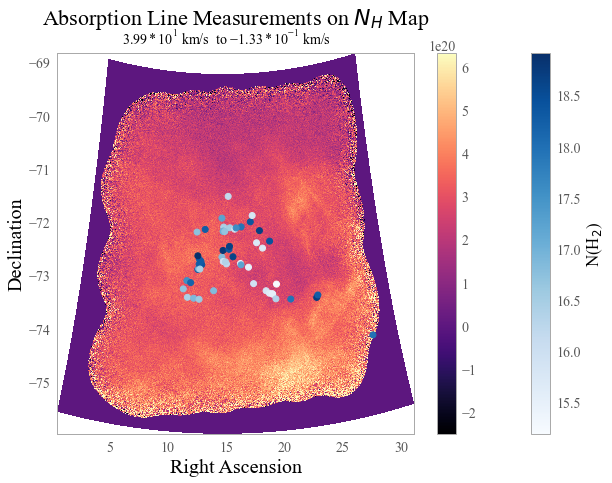

In [785]:
# save this figure (3/4 GASKAP-HI Meeting)
chan_map_abs_plt(coords, tot_col_dens, '$\mathregular{3.99 * 10^{1}}$ km/s  to $\mathregular{-1.33 * 10^{-1}}$ km/s', -0.25 * 10 ** 21, 0.63 * 10 ** 21, 'Blues', True, 'FUSE_atop_tot_col_dens.png')


/var/folders/xk/1lmd1p057bnc571tp2ws6_sc0000gp/T/ipykernel_7459/1349022062.py:4: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  image = plt.pcolormesh(coordinates[:, :, 0], coordinates[:, :, 1], cube, vmin = vmin_val , vmax = vmax_val, shading = 'auto', cmap = 'magma')


[720. 504.]


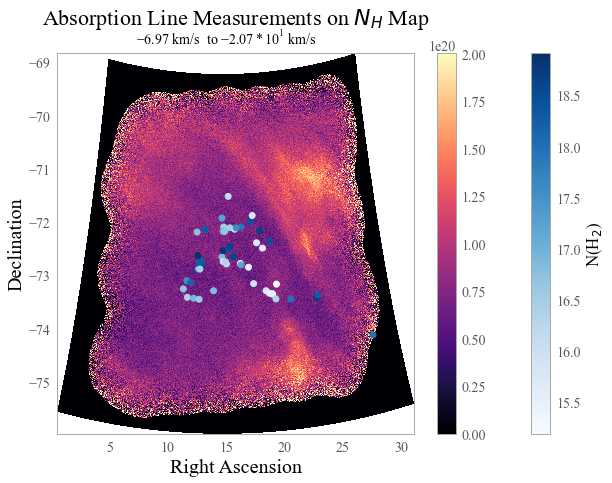

In [786]:
# save this figure (3/4 GASKAP-HI Meeting)

chan_map_abs_plt(coords, col_dens3, '$\mathregular{-6.97}$ km/s  to $\mathregular{-2.07 * 10^{1}}$ km/s', -2 * 10 ** 3, 2 * 10 ** 20, 'Blues', True, 'FUSE_atop_col_dens3.png')
